In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

%matplotlib inline

In [2]:
# Data reading

data = pd.read_csv('fire.csv')

data.sample(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
310970,-30.09927,152.47969,349.1,0.41,0.37,2019-11-18,342,N,VIIRS,n,1.0NRT,308.0,14.6,D
358968,-17.04528,124.29942,367.0,0.34,0.56,2019-11-22,554,N,VIIRS,h,1.0NRT,304.5,18.1,D
278804,-30.39889,152.28223,349.1,0.61,0.53,2019-11-15,254,N,VIIRS,n,1.0NRT,317.4,65.9,D
780256,-37.33289,148.56462,333.3,0.42,0.38,2019-12-30,1512,N,VIIRS,n,1.0NRT,287.0,3.8,N
946853,-36.97594,146.70470,300.9,0.46,0.39,2020-01-09,1524,N,VIIRS,n,1.0NRT,285.2,1.2,N
767441,-27.89263,131.97768,353.3,0.38,0.59,2019-12-30,536,N,VIIRS,n,1.0NRT,303.6,11.6,D
933845,-31.93565,121.63758,367.0,0.41,0.61,2020-01-07,624,N,VIIRS,h,1.0NRT,310.8,28.6,D
369222,-14.59248,127.97160,338.6,0.49,0.40,2019-11-24,512,N,VIIRS,l,1.0NRT,310.2,4.4,D
224502,-29.20719,152.44104,298.4,0.40,0.60,2019-11-10,1406,N,VIIRS,n,1.0NRT,285.3,2.1,N
291185,-31.69892,152.14676,339.5,0.73,0.76,2019-11-15,1554,N,VIIRS,n,1.0NRT,292.4,5.6,N


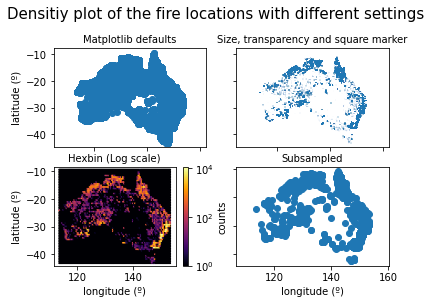

In [3]:
fig, ax = plt.subplots(2, 2)

fig.suptitle('Densitiy plot of the fire locations with different settings', fontsize=15, y=1.025)

# Common settings
for a in ax.flat:
    a.axis('equal')
    a.set_xlabel('longitude (º)')
    a.set_ylabel('latitude (º)')
    a.label_outer()

# Matplotlib defaults
ax[0, 0].scatter(data['longitude'], data['latitude'])
ax[0, 0].set_title('Matplotlib defaults', fontsize=10)

# Size, transparency and square marker
size = 0.2 * data['scan'] * data['track'] # One could also add a scale factor here
ax[0, 1].scatter(data['longitude'], data['latitude'], alpha=.025, s=size, marker='s')
ax[0, 1].set_title('Size, transparency and square marker', fontsize=10)

# Hexbin
hb = ax[1, 0].hexbin(data['longitude'], data['latitude'], gridsize=100, bins='log', cmap='inferno')
fig.colorbar(hb, ax=ax[1, 0]).set_label('counts')
ax[1, 0].set_title('Hexbin (Log scale)', fontsize=10)

# Subsampled
n_samples = len(data.index)
samples = np.random.choice(n_samples, int(n_samples/500))
ax[1, 1].scatter(data.loc[samples, 'longitude'], data.loc[samples, 'latitude'])
ax[1, 1].set_title('Subsampled', fontsize=10)

plt.show()

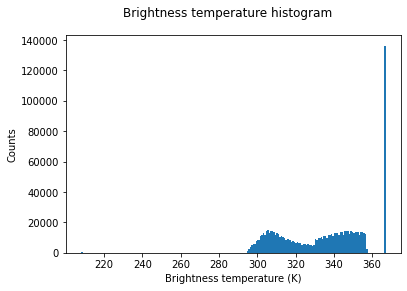

In [4]:
fig, ax = plt.subplots()

fig.suptitle('Brightness temperature histogram')

ax.hist(data['bright_ti4'], bins='auto')
ax.set_xlabel('Brightness temperature (K)')
ax.set_ylabel('Counts')

plt.show()

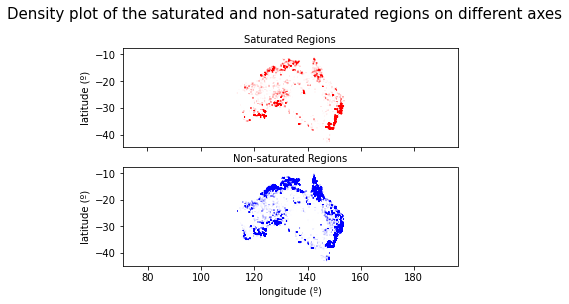

In [5]:
fig, ax = plt.subplots(2)

fig.suptitle('Density plot of the saturated and non-saturated regions on different axes', fontsize=15, y=1.025)

# Common settings
for a in ax.flat:
    a.axis('equal')
    a.set_xlabel('longitude (º)')
    a.set_ylabel('latitude (º)')
    a.label_outer()

size = data['scan'] * data['track'] # One could also add a scale factor here
saturated_values = data['bright_ti4'] == max(data['bright_ti4'])

ax[0].scatter(data.loc[saturated_values, 'longitude'], data.loc[saturated_values, 'latitude'], alpha=.005, s=size.loc[saturated_values], marker='s', color='r')
ax[1].scatter(data.loc[~saturated_values, 'longitude'], data.loc[~saturated_values, 'latitude'], alpha=.005, s=size.loc[~saturated_values], marker='s', color='b')

ax[0].set_title('Saturated Regions', fontsize=10)
ax[1].set_title('Non-saturated Regions', fontsize=10)

plt.show()

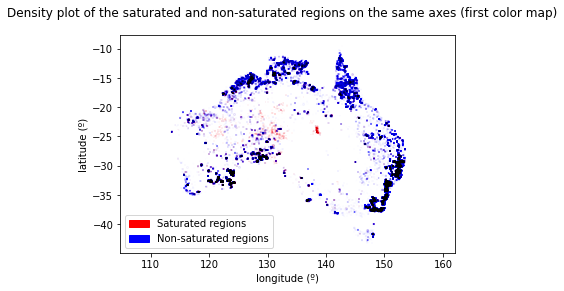

In [6]:
fig, ax = plt.subplots()

fig.suptitle('Density plot of the saturated and non-saturated regions on the same axes (first color map)')

ax.axis('equal')
ax.set_xlabel('longitude (º)')
ax.set_ylabel('latitude (º)')

ax.scatter(data.loc[saturated_values, 'longitude'], data.loc[saturated_values, 'latitude'], alpha=.005, s=4*size.loc[saturated_values], marker='s', color='r')
ax.scatter(data.loc[~saturated_values, 'longitude'], data.loc[~saturated_values, 'latitude'], alpha=.005, s=4*size.loc[~saturated_values], marker='s', color='b')

sat_legend = ptc.Patch(color='r', label='Saturated regions')
non_sat_legend = ptc.Patch(color='b', label='Non-saturated regions')
ax.legend(handles=[sat_legend, non_sat_legend])

plt.show()